<center><bold><span style="font-size: 3em;">Linear Regression</span></bold></center>

In [1]:
# pip install sklearn

In [2]:
import numpy as np
import pandas as pd

In [3]:
hr = pd.read_csv('housing3.csv')

In [4]:
hr.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,locality
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished,gulshan
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished,mohakhali
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished,bashundhara
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished,bashundhara
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished,azimpur
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,semi-furnished,banani
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,semi-furnished,gulshan
7,10150000,16200,5,3,2,yes,no,no,no,no,0,unfurnished,banasree
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,furnished,banani
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,unfurnished,banani


# Check for null values

In [5]:
hr.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,locality
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
hr.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
locality            0
dtype: int64

## No null values

In [7]:
hr.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Exploratory Data Analysis

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Check area vs price plot

<Axes: xlabel='area', ylabel='price'>

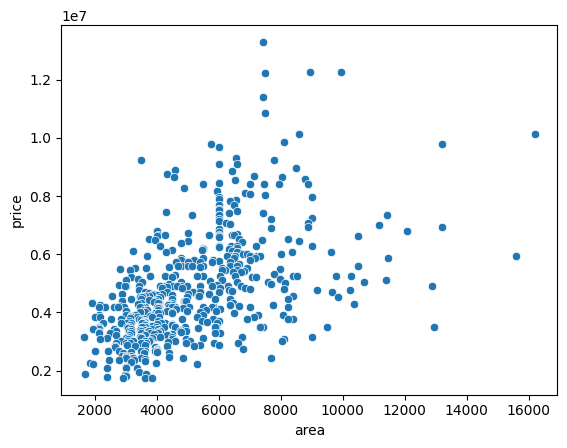

In [9]:
sns.scatterplot(x='area', y='price', data=hr)

### Check prices for houses near the main road

<Axes: xlabel='area', ylabel='price'>

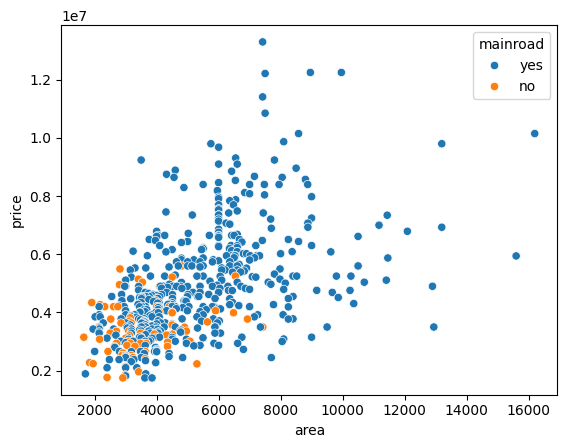

In [10]:
sns.scatterplot(x='area', y='price', data=hr, hue='mainroad')

# Cost Function
## You can check out this link to read about cost function of linear regression.
### https://www.shiksha.com/online-courses/articles/cost-function-in-machine-learning/


#### It looks like houses not near the main road have lower prices

## Formula for Single Variable Linear Regression
<br>
<hr>
<center><bold><i><span style="font-size: 3em;">Y = A + BX</span></i></bold></center>


![Formula](formula2.png)

In [11]:
sx = hr['area'].sum().astype(float)
sy = hr['price'].sum().astype(float)
sxy = (hr['area'] * hr['price']).sum().astype(float)
sx2 = (hr['area'] * hr['area']).sum().astype(float)
n = hr['area'].size

### Intercept (A)

In [12]:
a = (sy*sx2 - sx*sxy) / (n*sx2 - sx*sx)

In [13]:
a

2387308.482396426

### Coefficient (B)

In [14]:
b = (n*sxy - sx*sy) / (n*sx2 - sx*sx)

In [15]:
b

461.97489427278344

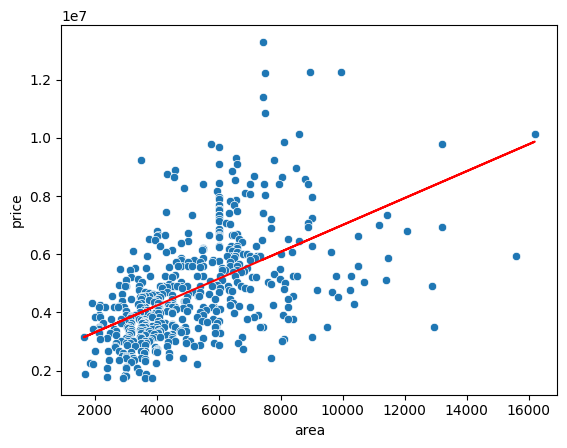

In [16]:
sns.scatterplot(x='area', y='price', data=hr);
plt.plot(hr['area'], hr['area']*b+a, color='r');

#### But there is no need to write so much code. We can just use SKLearn library to do all this in 2-3 lines.

## Using SKLearn

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
LRModel = LinearRegression()

In [19]:
LRModel.fit(hr[['area']], hr['price'])

LinearRegression()

#### Note that we use [['area']], as the linear regression model expects a 2D array as the first argument (which is the independent variable X).

In [20]:
LRModel.coef_

array([461.97489427])

In [21]:
LRModel.intercept_

2387308.4823964303

### Same values obtained as before

## How do we use this model? We can use it to predict prices of unknown houses

In [22]:
LRModel.predict([[1000]])

/home/hakim15/anaconda3/envs/ProtTransDemo/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2849283.37666921])

### We have predicted the price of a 1000 square feet house.

# How to evaluate our model?
- **Split data into training and test data**
- **Train model using training data**
- **Evaluate using test data**

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = hr.drop(['price'], axis=1)

In [25]:
X.head(5)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,locality
0,7420,4,2,3,yes,no,no,no,yes,2,furnished,gulshan
1,8960,4,4,4,yes,no,no,no,yes,3,furnished,mohakhali
2,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished,bashundhara
3,7500,4,2,2,yes,no,yes,no,yes,3,furnished,bashundhara
4,7420,4,1,2,yes,yes,yes,no,yes,2,furnished,azimpur


In [26]:
y = hr['price']

In [27]:
y.head(5)

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)

#### Test size determines the percentage of data to be used for test set. Specifying the random state lets you reproduce your results later.

In [29]:
X.shape

(545, 12)

In [30]:
X_train.shape

(408, 12)

In [31]:
y_train.shape

(408,)

In [32]:
LRModel.fit(X_train[['area']], y_train)

LinearRegression()

In [33]:
LRModel.coef_

array([498.91171895])

In [34]:
LRModel.intercept_

2207121.657125119

In [35]:
ypred = LRModel.predict(X_test[['area']])

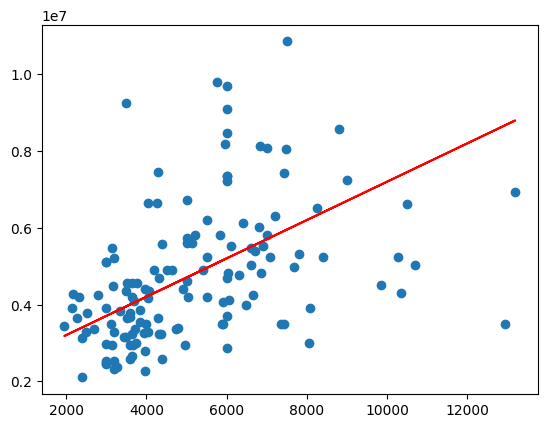

In [36]:
plt.plot(X_test['area'], ypred, color='r');
plt.scatter(X_test['area'], y_test);

## Evaluating our model

#### We generally use the R2 (R-Squared) score to evaluate a linear regression model.

## Interpretation of R-Squared
The most common interpretation of r-squared is how well the regression model explains observed data. For example, an r-squared of 60% reveals that 60% of the variability observed in the target variable is explained by the regression model. Generally, a higher r-squared indicates more variability is explained by the model.

### The simplest way to find the score is to call the score function of the LinearRegression model. You need to give it the X and y values as arguments. In our case, if we give it X_train and y_train, we can obtain the training score, and if we give it the X_test and y_test, we can obtain the test score.

In [37]:
LRModel.score(X_train[['area']], y_train)

0.32485596163191055

In [38]:
LRModel.score(X_test[['area']], y_test)

0.15089952428996556

#### Generally the training score is higher than the test score. But our main goal is to obtain better test scores.

#### You can also use the following functions to evaluate your model score.

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, r2_score

In [40]:
def eval(model, X_train, y_train, X_test, y_test):
    print("The training score is,", model.score(X_train, y_train), end='\n')
    print("The testing score is,", model.score(X_test, y_test))

#### The eval function will calculate both the training and test score of your model.

In [41]:
def metric_score(y_test, ypred):
    print("The mean absolute error is: ", mean_absolute_error(y_test, ypred))
    print("The mean squared error is: ", mean_squared_error(y_test, ypred))
    print("The R2 score is: ", r2_score(y_test, ypred)) 

#### This function will calculate the error of your model as well.

In [42]:
eval(LRModel, X_train[['area']], y_train, X_test[['area']], y_test)

The training score is, 0.32485596163191055
The testing score is, 0.15089952428996556


In [43]:
metric_score(y_test, ypred)

The mean absolute error is:  1224691.0646906216
The mean squared error is:  2677139975171.3047
The R2 score is:  0.15089952428996556


# Using multiple features: Multiple Regresssion

### As our previous results were not that impressive, we will try to use more features to train our model.

# More exploratory data anlaysis

## # of bedrooms vs price: boxplot

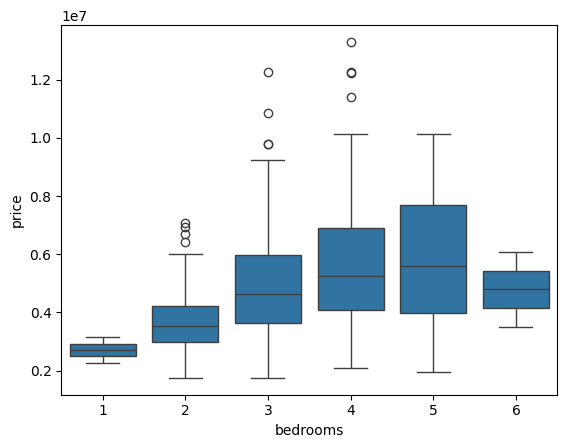

In [44]:
sns.boxplot(x='bedrooms', y='price', data=hr);

Houses with 4 to 5 bedrooms are the most expensive.

## parking vs price: boxplot

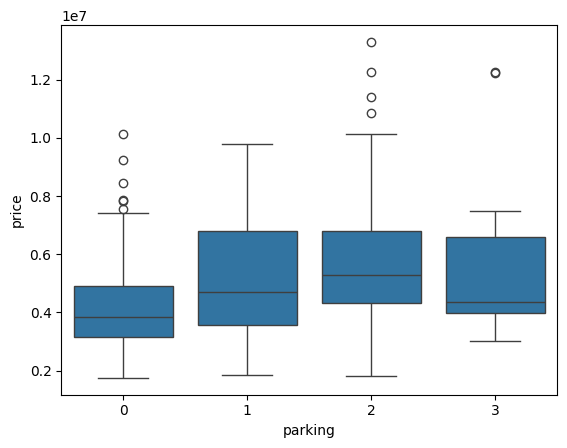

In [45]:
sns.boxplot(x='parking', y='price', data=hr);

Houses with 2 parking spots are the most expensive.

## Furnishing vs price: violin plot

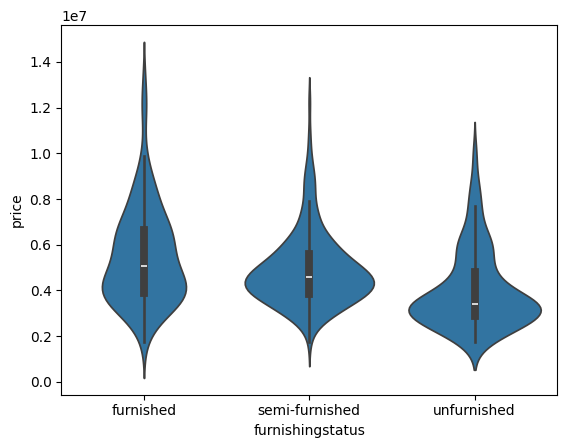

In [46]:
sns.violinplot(x='furnishingstatus', y='price', data=hr);

Unfurnished houses are the most economical.

## Correlation between 2 attributes

In [47]:
hr_copy = hr[['price', 'area', 'bedrooms']]

In [48]:
hr_copy.corr()

,price,area,bedrooms
price,1.000000,0.535997,0.366494
area,0.535997,1.000000,0.151858
bedrooms,0.366494,0.151858,1.000000


### Area, bathrooms, stories have great impact on the price

In [49]:
hr.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
furnishingstatus    object
locality            object
dtype: object

In [50]:
hr.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,locality
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished,gulshan
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished,mohakhali
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished,bashundhara
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished,bashundhara
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished,azimpur


We need to turn the objects into numeric values

# How to use categorical features?

## We can label them using numbers

In [51]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

 ####  An example first

In [52]:
hr['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [53]:
lb = LabelEncoder()
lb.fit_transform(hr['furnishingstatus'])[:10]

array([0, 0, 1, 0, 0, 1, 1, 2, 0, 2])

In [54]:
hr['furnishingstatus'].head(10)

0         furnished
1         furnished
2    semi-furnished
3         furnished
4         furnished
5    semi-furnished
6    semi-furnished
7       unfurnished
8         furnished
9       unfurnished
Name: furnishingstatus, dtype: object

### furnished -> 0
### semi-furnished -> 1
### furnished -> 2

#### How do we encode all such columns?

In [55]:
lb_encoders = {}

In [56]:
label_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']

In [57]:
hr[label_columns].head(5)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,furnishingstatus
0,yes,no,no,no,yes,furnished
1,yes,no,no,no,yes,furnished
2,yes,no,yes,no,no,semi-furnished
3,yes,no,yes,no,yes,furnished
4,yes,yes,yes,no,yes,furnished


In [58]:
for i in label_columns:
    lb_encoders[i] = LabelEncoder()
    hr[i] = lb_encoders[i].fit_transform(hr[i])

In [59]:
hr.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,locality
0,13300000,7420,4,2,3,1,0,0,0,1,2,0,gulshan
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,mohakhali
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,bashundhara
3,12215000,7500,4,2,2,1,0,1,0,1,3,0,bashundhara
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,azimpur


## But some categories should be one hot encoded
### https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

In [60]:
hr['locality'].unique()

array(['gulshan', 'mohakhali', 'bashundhara', 'azimpur', 'banani',
       'banasree', 'dhanmondi', 'paltan'], dtype=object)

 Assigning numerical values to these locations does not make sense
## We need to use one hot encoding instead

In [61]:
ohc = OneHotEncoder(drop='first')

#### We do not need to keep all columns, we can drop one column and still retain all the information needed. That's why we are dropping the first column.

In [62]:
tmp = ohc.fit_transform(hr[['locality']])

In [63]:
tmp.toarray()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [64]:
ohc.categories_[0]

array(['azimpur', 'banani', 'banasree', 'bashundhara', 'dhanmondi',
       'gulshan', 'mohakhali', 'paltan'], dtype=object)

In [65]:
hr[ohc.categories_[0][1:]] = tmp.toarray()

In [66]:
hr.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,locality,banani,banasree,bashundhara,dhanmondi,gulshan,mohakhali,paltan
0,13300000,7420,4,2,3,1,0,0,0,1,2,0,gulshan,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,mohakhali,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,bashundhara,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,0,bashundhara,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,azimpur,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Drop locality as it is no longer needed**

In [67]:
hr = hr.drop(['locality'], axis=1)

In [68]:
hr.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,banani,banasree,bashundhara,dhanmondi,gulshan,mohakhali,paltan
0,13300000,7420,4,2,3,1,0,0,0,1,2,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### We can now start training

In [69]:
X = hr.drop(['price'], axis=1)

In [70]:
y = hr['price']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)

In [72]:
LRModel2 = LinearRegression()

In [73]:
LRModel2.fit(X_train, y_train)

LinearRegression()

In [74]:
LRModel2.coef_

array([ 2.72704500e+02,  6.91868352e+04,  9.76551897e+05,  4.42413116e+05,
        3.14366150e+05,  3.53049835e+05,  3.65041675e+05,  7.22213601e+05,
        9.30462833e+05,  2.43840700e+05, -2.43974835e+05,  6.49638147e+05,
        9.16207888e+04,  1.01275588e+06,  4.52473831e+05,  7.51962602e+05,
       -4.72186672e+04, -1.83797708e+05])

In [75]:
LRModel2.intercept_

255473.37381932233

In [76]:
X_train.columns.size

18

In [77]:
sns.barplot(LRModel2.coef_, X_train.columns)

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

#### These values indicate how each feature is being used by our model

In [ ]:
LRModel2.score(X_test, y_test)

### Much better score now.

In [ ]:
eval(LRModel2, X_train, y_train, X_test, y_test)

In [ ]:
metric_score(y_test, LRModel2.predict(X_test))

### How de we use this model to predict prices of new flats? Let's look at an example.

In [ ]:
task = [
    [7000, 2, 2, 2, 'no', 'yes', 'no', 'no', 'yes', 1, 'semi-furnished', 'mohakhali'],
    [3000, 3, 3, 1, 'no', 'yes', 'yes', 'yes', 'yes', 2, 'furnished', 'gulshan']
]

#### Here, task contains the data of two houses. We can also predict the price of as many houses we want at a time.

### Let's convert the task from a python list to a Pandas dataframe.

In [ ]:
hr2 = pd.read_csv('housing3.csv')

In [ ]:
hr2.columns

In [ ]:
hr2.columns[1:]

In [ ]:
taskdf = pd.DataFrame(task, columns=hr2.columns[1:])

In [ ]:
taskdf

### We now need to label encode the categorical columns.

In [ ]:
for i in label_columns:
    taskdf[i] = lb_encoders[i].transform(taskdf[i])

### Please note that we use the "transform" function now. Previously, we used the "fit_transform" function.

In [ ]:
taskdf

### We need to one-hot encode the 'locality' column.

In [ ]:
taskdf['locality']

In [ ]:
taskdf[ohc.categories_[0][1:]] = ohc.transform(taskdf[['locality']]).toarray()

In [ ]:
taskdf

In [ ]:
taskdf.drop(['locality'], axis=1, inplace=True)

In [ ]:
taskdf

## We now call the predict function of our trained model (LRModel2) to predict the price of the new houses.

In [ ]:
LRModel2.predict(taskdf)

# Regularization

### If you are interested to further improve your model, you can read about regularization. Then you can try the following methods as demonstrated below.
#### https://www.dataquest.io/blog/regularization-in-machine-learning/
#### https://www.simplilearn.com/tutorials/machine-learning-tutorial/regularization-in-machine-learning#:~:text=MLExplore%20Program-,What%20is%20Regularization%20in%20Machine%20Learning%3F,and%20prevent%20overfitting%20or%20underfitting.

## Lasso (L1) Regularization

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
LassoModel = Lasso()

In [ ]:
LassoModel.fit(X_train, y_train);

In [ ]:
LassoModel.score(X_test, y_test)

In [ ]:
eval(LassoModel, X_train, y_train, X_test, y_test)

In [ ]:
sns.barplot(LassoModel.coef_, X_train.columns)

In [ ]:
LassoModel.coef_.sum()

In [ ]:
metric_score(y_test, LassoModel.predict(X_test))

## Ridge (L2) regularization

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
RidgeModel = Ridge(alpha=10)

In [ ]:
RidgeModel.fit(X_train, y_train)

In [ ]:
RidgeModel.score(X_test, y_test)

In [ ]:
eval(RidgeModel, X_train, y_train, X_test, y_test)

In [ ]:
sns.barplot(RidgeModel.coef_, X_train.columns)

In [ ]:
RidgeModel.coef_.sum()

In [ ]:
metric_score(y_test, RidgeModel.predict(X_test))

## ElasticNet (hybrid) regularization

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
ENModel = ElasticNet()

In [ ]:
ENModel.fit(X_train, y_train)

In [ ]:
ENModel.score(X_test, y_test)

In [ ]:
eval(ENModel, X_train, y_train, X_test, y_test)